[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********


📊 Top 5 Stocks by P/B Ratio and Market Cap:
          Ticker  P/B_Ratio  P/B_Ratio_Calculated    Market_Cap
0    ADANIENT.NS   6.345219              6.345219  3.023259e+12
1  ADANIPORTS.NS   5.019722              5.019722  3.132635e+12
2  APOLLOHOSP.NS  13.122445             13.122445  1.041291e+12
3  ASIANPAINT.NS  11.715698             11.715698  2.244513e+12
4    AXISBANK.NS   1.940949              1.940949  3.718947e+12


[*********************100%***********************]  1 of 1 completed



📉 Regression Results for ICICIBANK.NS:
      Ticker    Alpha      MKT       SMB      HML      R2  Adj_R2
ICICIBANK.NS 0.000294 1.000744 -0.600697 0.174895 0.52844 0.52729

📈 Regression Data Structure for ICICIBANK (first 5 rows):
            Excess_Return       MKT       SMB       HML
Date                                                   
2020-07-03      -0.005310  0.005062 -0.002968 -0.015755
2020-07-06       0.002153  0.014429 -0.000505  0.012951
2020-07-07       0.038294  0.003141 -0.002428 -0.011989
2020-07-08      -0.019259 -0.008931  0.008241  0.007357
2020-07-09       0.003589  0.009811 -0.000595  0.012419


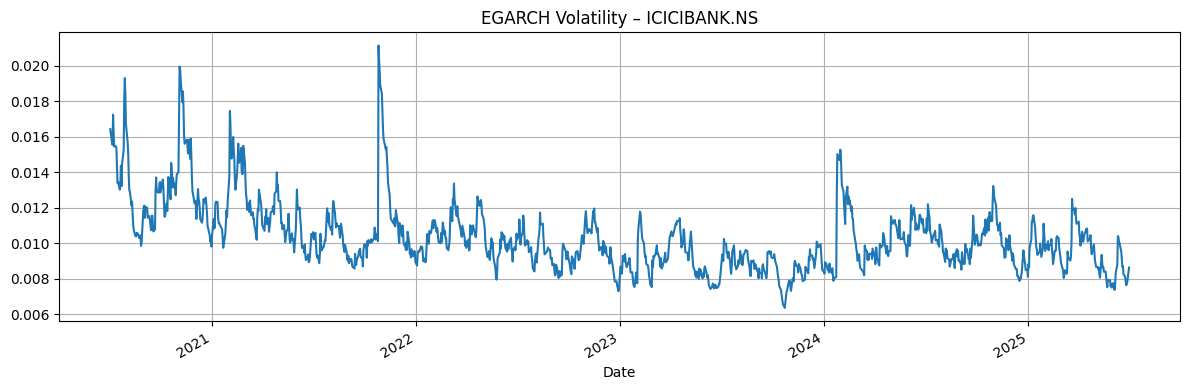


📊 EGARCH(1,1) Model Summary for ICICIBANK.NS:
Omega (ω): -0.57351
Alpha (α₁): 0.16945
Beta (β₁): 0.93664
Gamma (γ₁): N/A
μ (Mean return): -0.00016663


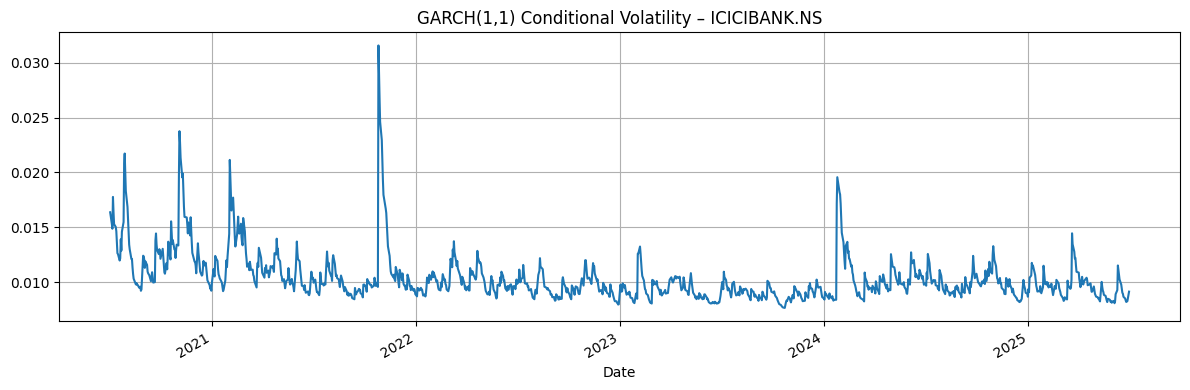

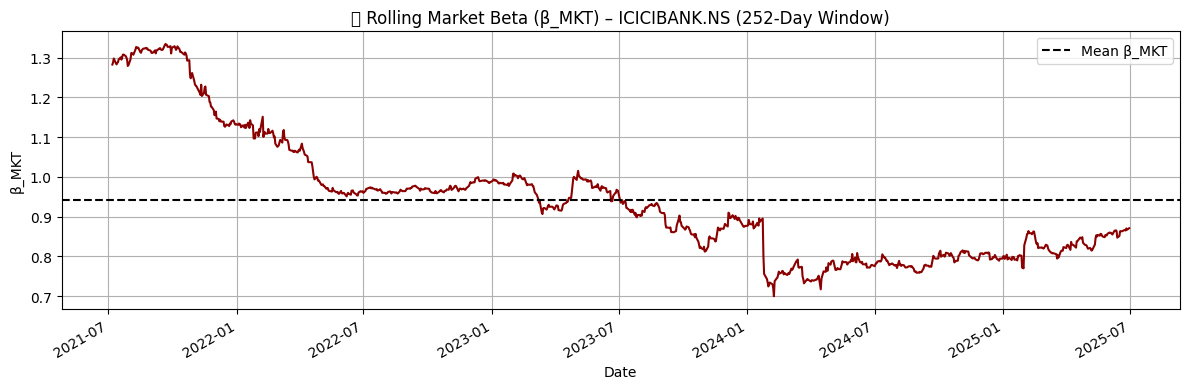

In [ ]:

# NIFTY 50 Return & Volatility Analysis with Fama-French + EGARCH + GARCH + Rolling Regression

import os
import glob
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm
from arch import arch_model
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# STEP 1: Download NIFTY 50 stock data
nifty50_symbols = [
    "ADANIENT.NS", "ADANIPORTS.NS", "APOLLOHOSP.NS", "ASIANPAINT.NS", "AXISBANK.NS",
    "BAJAJ-AUTO.NS", "BAJFINANCE.NS", "BAJAJFINSV.NS", "BEL.NS", "BHARTIARTL.NS",
    "BRITANNIA.NS", "CIPLA.NS", "COALINDIA.NS", "DIVISLAB.NS", "DRREDDY.NS",
    "EICHERMOT.NS", "GRASIM.NS", "HCLTECH.NS", "HDFCBANK.NS", "HDFCLIFE.NS",
    "HEROMOTOCO.NS", "HINDALCO.NS", "HINDUNILVR.NS", "ICICIBANK.NS", "INDUSINDBK.NS",
    "INFY.NS", "ITC.NS", "JSWSTEEL.NS", "KOTAKBANK.NS", "LT.NS",
    "LTIM.NS", "M&M.NS", "MARUTI.NS", "NESTLEIND.NS", "NTPC.NS",
    "ONGC.NS", "POWERGRID.NS", "RELIANCE.NS", "SBILIFE.NS", "SBIN.NS",
    "SUNPHARMA.NS", "TCS.NS", "TATACONSUM.NS", "TATAMOTORS.NS", "TATASTEEL.NS",
    "TECHM.NS", "TITAN.NS", "ULTRACEMCO.NS", "UPL.NS", "WIPRO.NS"
]

os.makedirs("nifty50_5yr_data", exist_ok=True)
import datetime
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days=5*365)

for symbol in nifty50_symbols:
    df = yf.download(symbol, start=start_date, end=end_date, interval="1d", auto_adjust=False)
    df.to_csv(f"nifty50_5yr_data/{symbol}_5yr.csv")

# STEP 2: Clean and compute log returns
price_data = {}
for filename in glob.glob("nifty50_5yr_data/*.csv"):
    ticker = os.path.basename(filename).replace('_5yr.csv', '')
    df = pd.read_csv(filename)
    df.rename(columns={df.columns[0]: 'Date'}, inplace=True)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df.dropna(subset=['Date'])
    df = df.sort_values('Date').reset_index(drop=True)
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
    df = df[['Date', 'Close']].dropna()
    df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))
    df.dropna(inplace=True)
    price_data[ticker] = df

# STEP 3: Get fundamentals and calculate P/B ratio
fundamentals = []
for ticker in nifty50_symbols:
    info = yf.Ticker(ticker).info
    fundamentals.append({
        'Ticker': ticker,
        'Shares_Outstanding': info.get('sharesOutstanding'),
        'P/B_Ratio': info.get('priceToBook'),
        'Book_Value_Per_Share': info.get('bookValue'),
        'Market_Price': info.get('currentPrice')
    })

fundamentals_df = pd.DataFrame(fundamentals)
fundamentals_df.fillna(fundamentals_df.median(numeric_only=True), inplace=True)
fundamentals_df['P/B_Ratio_Calculated'] = fundamentals_df['Market_Price'] / fundamentals_df['Book_Value_Per_Share']
latest_prices = {t: df['Close'].iloc[-1] for t, df in price_data.items() if not df.empty}
fundamentals_df['Latest_Price'] = fundamentals_df['Ticker'].map(latest_prices)
fundamentals_df['Market_Cap'] = fundamentals_df['Latest_Price'] * fundamentals_df['Shares_Outstanding']
fundamentals_df.to_csv("nifty50_fundamentals_with_pb.csv", index=False)

print("\n📊 Top 5 Stocks by P/B Ratio and Market Cap:")
print(fundamentals_df[['Ticker', 'P/B_Ratio', 'P/B_Ratio_Calculated', 'Market_Cap']].head())

# STEP 4: Calculate SMB and HML
median_size = fundamentals_df['Market_Cap'].median()
small = fundamentals_df[fundamentals_df['Market_Cap'] <= median_size]['Ticker']
big = fundamentals_df[fundamentals_df['Market_Cap'] > median_size]['Ticker']
fundamentals_df['BM'] = 1 / fundamentals_df['P/B_Ratio']
df_sorted = fundamentals_df.sort_values('BM')
n = len(df_sorted)
low = df_sorted.iloc[:int(n*0.3)]['Ticker']
mid = df_sorted.iloc[int(n*0.3):int(n*0.7)]['Ticker']
high = df_sorted.iloc[int(n*0.7):]['Ticker']

def get_portfolio_return(tickers):
    valid = [t for t in tickers if t in price_data and not price_data[t].empty]
    if not valid:
        sample_index = next(iter(price_data.values()))['Date']
        return pd.Series(index=sample_index)
    return pd.concat([price_data[t][['Date', 'Log_Return']].set_index('Date')['Log_Return'] for t in valid], axis=1).mean(axis=1)

SL = get_portfolio_return(set(small) & set(low))
SM = get_portfolio_return(set(small) & set(mid))
SH = get_portfolio_return(set(small) & set(high))
BL = get_portfolio_return(set(big) & set(low))
BM = get_portfolio_return(set(big) & set(mid))
BH = get_portfolio_return(set(big) & set(high))

SMB = (SL + SM + SH)/3 - (BL + BM + BH)/3
HML = (SH + BH)/2 - (SL + BL)/2
ff_factors = pd.concat([SMB.rename('SMB'), HML.rename('HML')], axis=1)
ff_factors.to_csv('ff_factors.csv')

# STEP 5: Market Excess Return (MKT)
nifty = yf.download("^NSEI", start="2020-06-01", end=str(end_date), auto_adjust=False)
nifty['Log_Return'] = np.log(nifty['Close'] / nifty['Close'].shift(1))
nifty.dropna(inplace=True)
rf_daily = pd.Series(0.05 / 252, index=nifty.index)
market_excess = nifty['Log_Return'] - rf_daily
market_excess.name = 'MKT'

# STEP 6: Fama-French Regression
returns = pd.DataFrame({t: df.set_index('Date')['Log_Return'] for t, df in price_data.items()})
returns.dropna(inplace=True)
ff_factors = pd.read_csv('ff_factors.csv', index_col=0, parse_dates=True)
ff_factors = ff_factors.reindex(returns.index)
market_excess = market_excess.reindex(returns.index)
factors_df = pd.concat([market_excess, ff_factors], axis=1).dropna()

results = []
for ticker in returns.columns:
    y = returns[ticker].sub(rf_daily).loc[factors_df.index]
    X = sm.add_constant(factors_df)
    model = sm.OLS(y, X).fit()
    results.append({
        'Ticker': ticker,
        'Alpha': model.params.get('const'),
        'MKT': model.params.get('MKT'),
        'SMB': model.params.get('SMB'),
        'HML': model.params.get('HML'),
        'R2': model.rsquared,
        'Adj_R2': model.rsquared_adj,
    })

ff3_results = pd.DataFrame(results)
ff3_results.to_csv('ff3_regression_results.csv', index=False)

# === ICICIBANK ===
print("\n📉 Regression Results for ICICIBANK.NS:")
icici_row = ff3_results[ff3_results['Ticker'] == 'ICICIBANK.NS']
print(icici_row.to_string(index=False))

# Regression data structure (ICICI)
y_sample = returns['ICICIBANK.NS'].sub(rf_daily).loc[factors_df.index]
regression_sample = pd.concat([y_sample.rename('Excess_Return'), factors_df], axis=1).dropna()

print("\n📈 Regression Data Structure for ICICIBANK (first 5 rows):")
print(regression_sample.head())

# === EGARCH Volatility ===
residuals = y_sample - sm.OLS(y_sample, sm.add_constant(factors_df)).fit().fittedvalues
am_egarch = arch_model(residuals, vol='EGARCH', p=1, q=1, rescale=False)
res_egarch = am_egarch.fit(disp='off')
res_egarch.conditional_volatility.plot(title='EGARCH Volatility – ICICIBANK.NS', figsize=(12, 4))
plt.grid(True)
plt.tight_layout()
plt.show()

# === GARCH(1,1) Volatility ===
am_garch = arch_model(residuals, vol='GARCH', p=1, q=1, rescale=False)
res_garch = am_garch.fit(disp='off')

# 📊 Print EGARCH(1,1) Model Parameters
print("\n📊 EGARCH(1,1) Model Summary for ICICIBANK.NS:")
egarch_params = res_egarch.params
print(f"Omega (ω): {egarch_params['omega']:.5g}")
print(f"Alpha (α₁): {egarch_params['alpha[1]']:.5g}")
print(f"Beta (β₁): {egarch_params['beta[1]']:.5g}")
print(f"Gamma (γ₁): {egarch_params.get('gamma[1]', 'N/A')}")
print(f"μ (Mean return): {egarch_params['mu']:.5g}")


plt.figure(figsize=(12, 4))
res_garch.conditional_volatility.plot(title='GARCH(1,1) Conditional Volatility – ICICIBANK.NS')
plt.grid(True)
plt.tight_layout()
plt.show()

# === Rolling Regression for β_MKT ===
window = 252
rolling_betas = []

for i in range(window, len(regression_sample)):
    y_window = regression_sample['Excess_Return'].iloc[i-window:i]
    X_window = sm.add_constant(regression_sample[['MKT', 'SMB', 'HML']].iloc[i-window:i])
    model = sm.OLS(y_window, X_window).fit()
    rolling_betas.append(model.params['MKT'])

rolling_dates = regression_sample.index[window:]
rolling_beta_series = pd.Series(rolling_betas, index=rolling_dates)

plt.figure(figsize=(12, 4))
rolling_beta_series.plot(title='📉 Rolling Market Beta (β_MKT) – ICICIBANK.NS (252-Day Window)', color='darkred')
plt.axhline(y=rolling_beta_series.mean(), color='black', linestyle='--', label='Mean β_MKT')
plt.ylabel("β_MKT")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:

pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 13.4 MB/s eta 0:00:00
